Task 1: Medical Cost Prediction using Multiple 
Regression
You are provided with the Medical Cost Personal Dataset, which contains demographic and 
health-related information of individuals along with their medical insurance charges.
Your task is to build a Multiple Linear Regression model to predict medical charges and 
evaluate its performance.

Step 1: Dataset Loading and Inspection 
1. Load the dataset (insurance.csv) into a Pandas DataFrame.
2. Display the first five rows of the dataset.
3. Use .info() and .describe() to summarize the dataset.
4. Identify:
o Target variable
o Feature variables
Briefly comment on the type of problem and the nature of the dataset

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# 1. Load the dataset (insurance.csv) into a Pandas DataFrame.
df=pd.read_csv('insurance.csv')


In [161]:
#2. Display the first five rows of the dataset.
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [162]:
# 3. Use .info() and .describe() to summarize the dataset.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1367 non-null   float64
 1   sex       1367 non-null   object 
 2   bmi       1367 non-null   float64
 3   children  1438 non-null   int64  
 4   smoker    1438 non-null   object 
 5   region    1367 non-null   object 
 6   charges   1438 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 78.8+ KB


,age,bmi,children,charges
count,1367.000000,1367.000000,1438.000000,1438.000000
mean,39.389905,30.466240,1.197497,14263.806370
std,14.025264,6.177811,1.307840,12869.081884
min,18.000000,15.000000,0.000000,1121.873900
25%,27.000000,26.030000,0.000000,4908.572200
50%,40.000000,30.250000,1.000000,9794.877050
75%,51.000000,34.457500,2.000000,19135.377290
max,64.000000,53.130000,5.000000,63770.428010


# 4. Identify:
# o Target variable
# o Feature variables
# Briefly comment on the type of problem and the nature of the dataset
charges is target variable
feature column is age , sex , bmi , children , smoker , region 
This is medical data in which we have to configure health related problems and evalute charges regarding their health. and type of dataset is medical related

In [163]:
x=df.drop(columns=['charges'])
y=df['charges']

Step 2: Data Preprocessing 
2.1 Handling Missing Values 
• Check for missing or null values.
• Handle missing values appropriately (if any).
• Explain your approach.
2.2 Feature Encoding 
• Encode categorical variables such as:
o sex
o smoker
o region
• Use One-Hot Encoding or Label Encoding where appropriate.
• Justify your encoding choice

In [164]:
# • Check for missing or null values.
df.isnull().sum()


age         71
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [165]:
# • Handle missing values appropriately (if any).
#• Explain your approach.

df['age']=df['age'].fillna(df['age'].median()) 
# for age I apply mean function to add average age in null data
df['sex']=df['sex'].fillna(df['sex'].mode()[0])
# for sex I apply mode function because this is categorical data
df['bmi']=df['bmi'].fillna(df['bmi'].median())
# for sex I apply mean function because this is numerical data
df['region']=df['region'].fillna(df['region'].mode()[0])
# for region ex I apply mode function because this is categorical data

2.2 Feature Encoding 
• Encode categorical variables such as:
o sex
o smoker
o region
• Use One-Hot Encoding or Label Encoding where appropriate.
• Justify your encoding choice

In [166]:
df=pd.get_dummies(df,drop_first=True)
df

# Justify your encoding choice
# apply one hot encoding because machine did not recognize text format so we have to apply one hot encoding to convert data to categorical


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,True,True,False,False,True
1,18.0,33.770,1,1725.55230,True,False,False,True,False
2,28.0,33.000,3,4449.46200,True,False,False,True,False
3,33.0,22.705,0,21984.47061,True,False,True,False,False
4,32.0,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1433,24.0,19.500,5,45255.58000,True,True,False,False,True
1434,26.0,24.200,4,4181.43000,False,False,False,False,True
1435,41.0,33.600,5,15486.23000,False,False,False,False,False
1436,18.0,33.000,1,47619.75000,True,False,False,False,False


2.3 Feature Scaling 
• Apply standardization or normalization to numerical features.
• Explain:
Why feature scaling is important in regression models

Answer
scaling is important because there is Big data so machine give them priority and data get baised so we have to normalize or standardize data


Step 3: Exploratory Data Analysis (EDA) 
Perform EDA to understand the dataset:
1. Plot the distribution of the charges variable.
2. Analyze the relationship between:
o age vs charges
o bmi vs charges
o smoker vs charges
3. Generate a correlation heatmap.
4. Highlight two key insights obtained from the analysis.

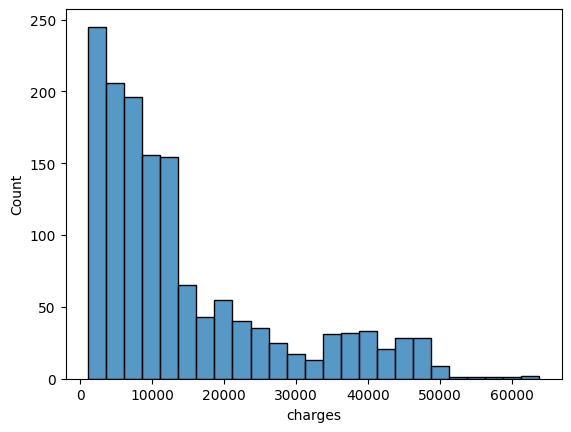

In [167]:

# 1. Plot the distribution of the charges variable.
sns.histplot(df['charges'])
plt.show()

2. Analyze the relationship between:
o age vs charges
age vs charges relation between them is positive 
o bmi vs charges
bmi vs charges relation between them is postive 
o smoker vs charges
relation between age vs charges is negative 
# df.corr() I used this function

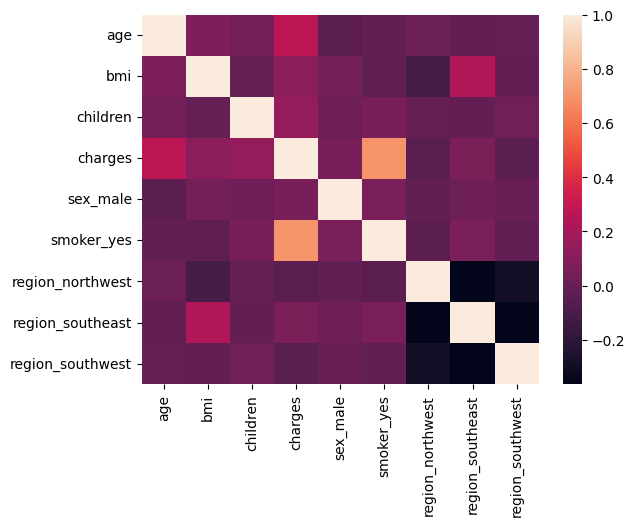

In [168]:
# 3. Generate a correlation heatmap.

corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix)
plt.show()

#4. Highlight two key insights obtained from the analysis.
1. age is not matter in this insights charges not applicable on the age of person
2. bmi vs charges Bmi level if high charges will be in directly propotional

Step 4: Model Building 
4.1 Data Splitting 
• Split the dataset into:
o Training set (80%)
o Testing set (20%)
4.2 Model Training 
• Train a Multiple Linear Regression model.
• Display model coefficients and intercept.
• Write the regression equation

In [195]:
#4.1 Data Splitting 
# • Split the dataset into:
# o Training set (80%)
# o Testing set (20%)
x=df.drop(columns=['charges'])
y=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)


In [198]:
# 4.2 Model Training 
# • Train a Multiple Linear Regression model.
# • Display model coefficients and intercept.
# • Write the regression equation
model=LinearRegression()




In [199]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [200]:
model.coef_

array([  258.84845864,   273.78658869,  1029.35248317,   -43.99514533,
       21817.67864192, -1224.40010109,  -976.98334349, -1456.71801576])

In [201]:
model.intercept_

np.float64(-9244.020807299281)

In [202]:
y_pred=model.predict(x_test)
y_pred

array([15483.57273848, 10311.50938082,  7340.21189285,  5609.63689146,
       33141.551988  ,  9737.00303186, 10443.73547902, 17138.16781325,
        8254.7873696 , 10116.15427693, 14022.29721859, 10721.57555451,
        9094.94336982, 14831.30965568, 11925.54822183,  9865.04209102,
        8916.41903851,  3512.1085463 , 17214.62477297, 33051.80400068,
        8781.63982834, 35917.30857717,  3048.37928578, 12877.17509588,
       10217.46088201,  4711.27241505, 15964.20169448, 32116.05360376,
       11666.00238108,  4648.60344272, 38666.18265114,  9234.40959615,
        9615.0979158 ,  7694.80552207, 32526.05361495, 15543.48888411,
       10328.67502768,  7581.74939454, 32308.83516323, 13358.97875892,
        9280.79875428,  2805.59733363, 12500.47599266, 32630.14832122,
        5168.89867013,  8340.5414775 ,  7193.93842773,  7265.28593279,
        9434.82081831, 38932.63656537,  3990.92244862, 26370.36819637,
        2074.82740651, 17734.19522221,  5017.38509593,  7740.14267216,
      

In [203]:
# # • Write the regression equation
# y=mx + c
y_analyse=(model.coef_ * [[16884.92400]]) + model.intercept_
y_analyse

array([[ 4.36139253e+06,  4.61362172e+06,  1.73712944e+07,
        -7.52098706e+05,  3.68380602e+08, -2.06831467e+07,
        -1.65055335e+07, -2.46058170e+07]])

Step 5: Model Evaluation 
Evaluate the model on the test dataset using:
• Mean Absolute Error (MAE)
• Mean Squared Error (MSE)
• Root Mean Squared Error (RMSE)
• R-squared (R²)
Explain what each metric indicates about model performance.

In [204]:
print('Mean Absolute Error (MAE)\n',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE)\n',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE)\n',np.sqrt(y_test,y_pred))
print('r2 score \n',r2_score(y_test,y_pred))


Mean Absolute Error (MAE)
 5383.572322283831
Mean Squared Error (MSE)
 56591636.70305158
Root Mean Squared Error (RMSE)
 386     108.887150
995      89.367081
42       79.198972
871      58.244014
725     202.317645
           ...    
868     114.584482
374      37.303200
1159     63.165188
486     111.693112
663      33.710524
Name: charges, Length: 288, dtype: float64
r2 score 
 -1.254212131446645


Task 2: Customer Term Deposit Prediction
You are provided with the Bank Marketing Dataset, which contains information collected 
from a Portuguese bank’s direct marketing campaign.
https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset
The goal is to build a classification model to predict whether a customer will subscribe to a 
term deposit (yes / no) based on socio-demographic and campaign features.
Data Loading & Inspection (3 Marks)
• Load the dataset into a Pandas DataFrame.
• Display the first five rows using .head().
• Use .info() and .describe() to summarize the dataset.
• Identify:
o The target variable
o The feature variables

In [119]:
df_bank=pd.read_csv('bank.csv')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [120]:
df_bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [121]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [122]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
# target variable is deposit
# rest of are features variable


Data Preprocessing (4 Marks)
• Handle missing values (if any), and justify your approach
(e.g., mean/median/mode imputation or row removal).
• Encode categorical variables such as:
o job
o marital
o education
o etc.
using One-Hot Encoding or Label Encoding.

In [123]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [131]:
cat_bank=pd.get_dummies(df_bank,drop_first=True)
cat_bank

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
1,56,45,5,1467,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
2,41,1270,5,1389,1,-1,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
3,55,2476,5,579,1,-1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
4,54,184,5,673,2,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
11158,39,733,16,83,4,-1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
11159,32,29,19,156,2,-1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
11160,43,0,8,9,2,172,5,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


Feature Analysis & Handling Class Imbalance (3 Marks)
• Plot the class distribution of the target variable (y).
• If the dataset is imbalanced, apply one method to address class imbalance:
o Oversampling
o Undersampling
o Class weights
• Briefly explain why handling class imbalance may be necessary.

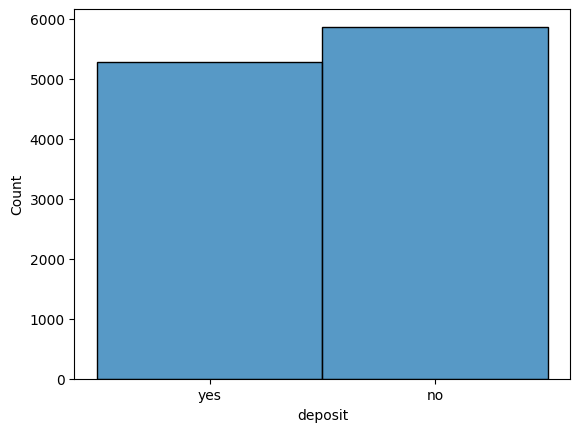

In [132]:
sns.histplot(df_bank['deposit'])
plt.show()


In [133]:
df_bank['deposit'].value_counts()
# dataset is Undersampling
#  Briefly explain why handling class imbalance may be necessary.
# class imbalance is important part in datasets if any imbalance occur we will apply backward and forward filling data into datasets

deposit
no     5873
yes    5289
Name: count, dtype: int64

Model Building (3 Marks)
• Split the dataset into:
o Training set (80%)
o Testing set (20%)
• Train on classification model:
o Logistic Regression
Model Evaluation (2 Marks)
Evaluate the model using:
• Accuracy
• Precision, Recall, F1-Score, Classification Matrix

In [137]:
cat_bank.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
1,56,45,5,1467,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
2,41,1270,5,1389,1,-1,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
3,55,2476,5,579,1,-1,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
4,54,184,5,673,2,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True


In [148]:
x=cat_bank.drop(columns=['deposit_yes'])
y=cat_bank['deposit_yes']

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [150]:
logistic_model=LogisticRegression()

In [151]:
logistic_model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [153]:
y_pred=logistic_model.predict(x_test)
y_pred

array([False, False, False, ...,  True,  True,  True], shape=(2233,))

In [158]:
print('accuracy_score', accuracy_score(y_test,y_pred))
print('classification report\n', classification_report(y_test,y_pred))
print('precision score\n', precision_score(y_test,y_pred))
print('recall score\n', recall_score(y_test,y_pred))
print('F1 Score\n', f1_score(y_test,y_pred))

accuracy_score 0.7966860725481415
classification report
               precision    recall  f1-score   support

       False       0.79      0.84      0.81      1182
        True       0.80      0.75      0.78      1051

    accuracy                           0.80      2233
   macro avg       0.80      0.79      0.80      2233
weighted avg       0.80      0.80      0.80      2233

precision score
 0.8036622583926755
recall score
 0.7516650808753568
F1 Score
 0.7767944936086529


Task 3:
• Discuss the following (Any 3)
• Overfitting
• Under fitting
• Bias
• Variance

Overfitting is when data know everyting and learn more about datasets
underfitting is when data know about few about datasets 
bias is when machine leanring model give priority to higher number and then model get bias